# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [117]:
if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

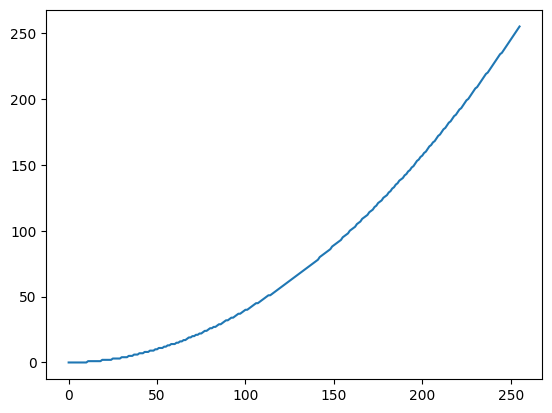

In [118]:
import lut
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

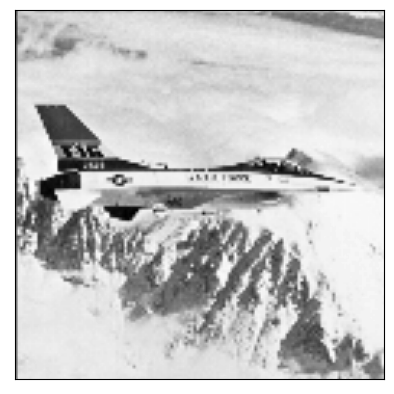

In [119]:
if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Img = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(Img)
plt.xticks([]), plt.yticks([])
plt.gray()
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

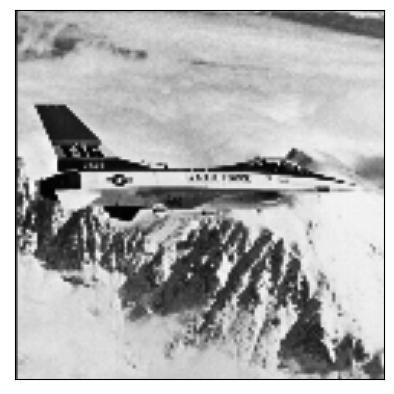

In [120]:
Img_lut=cv2.LUT(Img,lut.kwadratowa)
plt.imshow(Img_lut)
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [121]:
def LUT(image,recoding):
    Img_after=cv2.LUT(image,recoding)
    f, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.set_title('Wykres funkcji przekodowania')
    ax2.set_title('Oryginalny')
    ax3.set_title('Przekodowany')
    ax1.plot(recoding)
    ax1.set_aspect('equal')
    ax2.imshow(image)
    ax3.imshow(Img_after)
    
    for ax in (ax2, ax3):
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

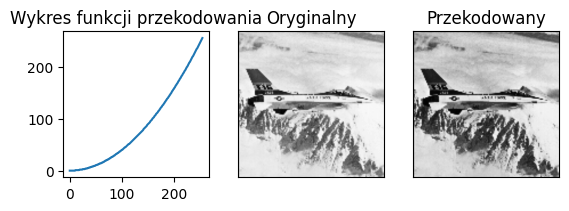

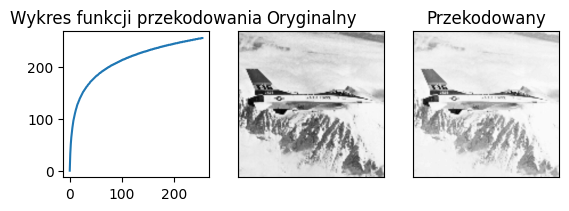

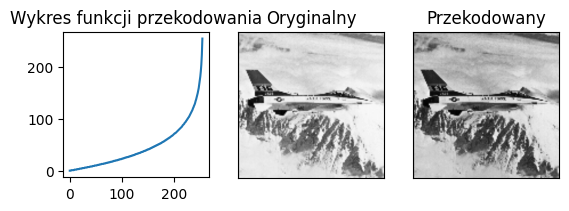

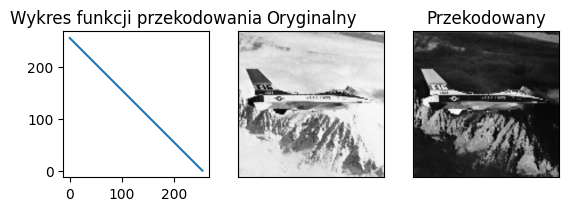

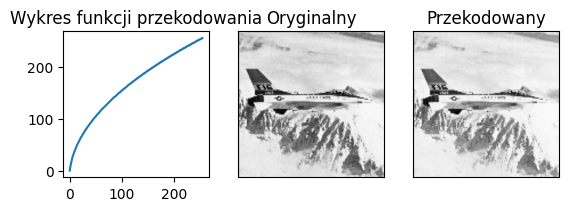

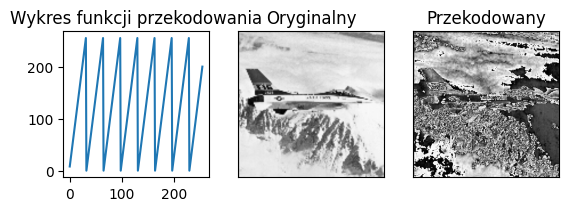

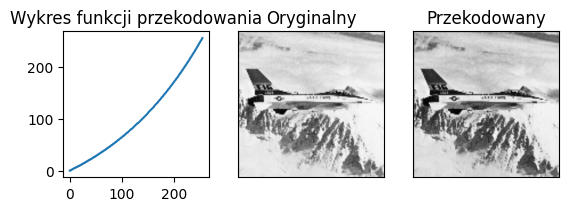

In [122]:
for recode in (lut.kwadratowa,lut.log,lut.odwlog,lut.odwrotna,lut.pierwiastkowa,lut.pila,lut.wykladnicza):
    LUT(Img,recode)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

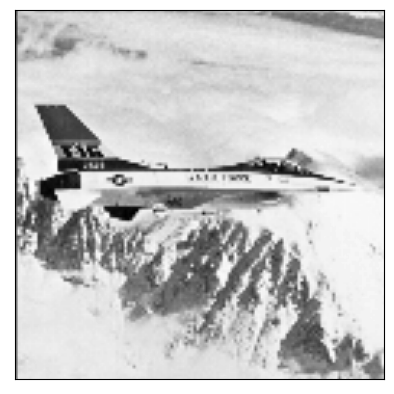

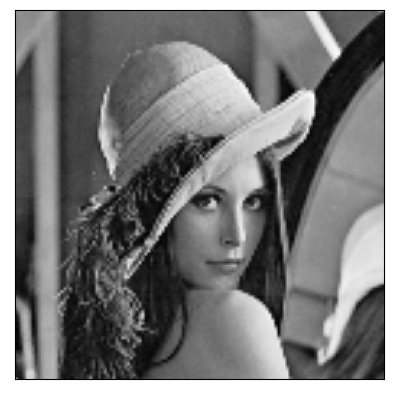

In [123]:
if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
    
Jet=cv2.imread("jet.bmp")
Lena=cv2.imread("lena.bmp")

Jet=cv2.cvtColor(Jet, cv2.COLOR_RGB2GRAY)
Lena=cv2.cvtColor(Lena, cv2.COLOR_RGB2GRAY)

plt.imshow(Jet)
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(Lena)
plt.xticks([])
plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

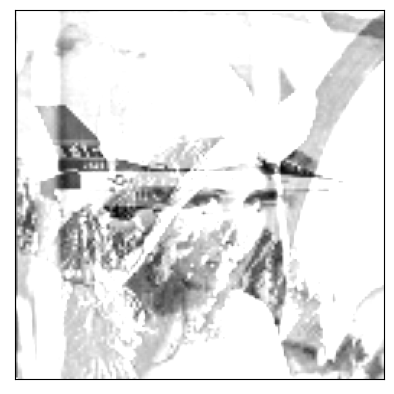

In [124]:
dodanie = cv2.add(Jet, Lena)
plt.imshow(dodanie)
plt.xticks([])
plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

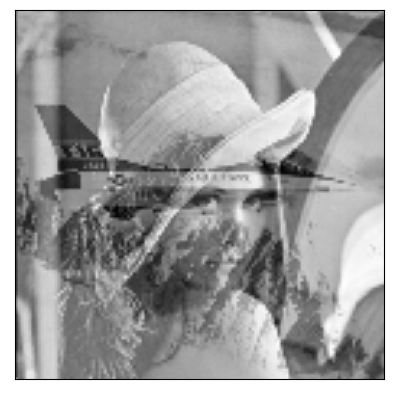

In [125]:
Jet_16 = Jet.astype('uint16')
Lena_16 = Lena.astype('uint16')
dodanie_16 = cv2.add(Jet_16, Lena_16)

dodanie_norm=cv2.normalize(dodanie_16,dodanie_16,0,255,cv2.NORM_MINMAX)
dodanie_8=dodanie_norm.astype('uint8')
plt.imshow(dodanie_8)
plt.xticks([])
plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

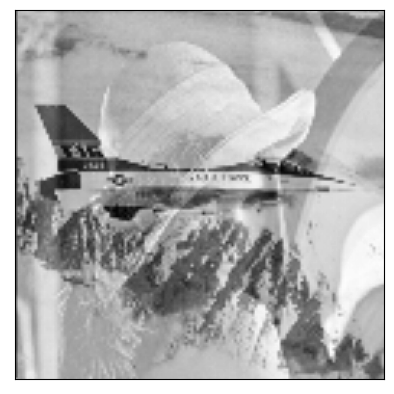

In [126]:
Sum = cv2.addWeighted(Jet,0.7,Lena,0.3,0)
plt.imshow(Sum)
plt.xticks([])
plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

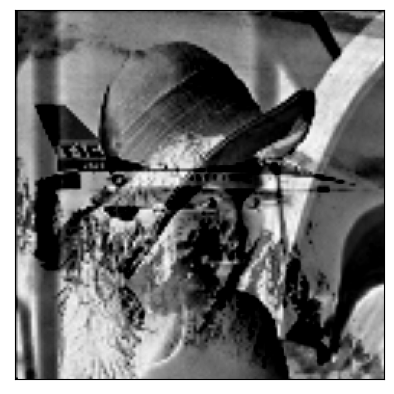

In [127]:
Sub = cv2.subtract(Jet, Lena)
plt.imshow(Sub)
plt.xticks([])
plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

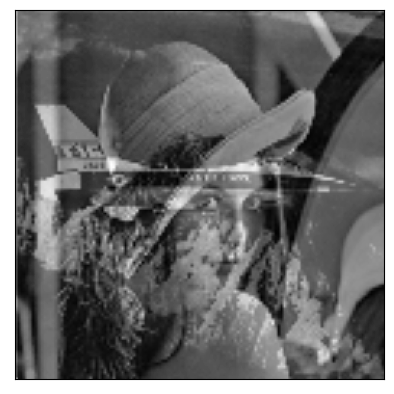

In [128]:
jet_16=Jet.astype('int16')
lena_16=Lena.astype('int16')

sub_16 = cv2.subtract(lena_16,jet_16)
sub_normalized=cv2.normalize(sub_16,sub_16,0,255,cv2.NORM_MINMAX)
sub_abs=np.abs(sub_normalized)
plt.imshow(sub_abs)
plt.xticks([])
plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

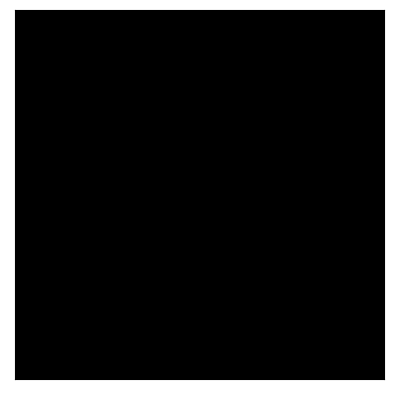

In [129]:
Mul = cv2.multiply(Lena, Jet)
plt.imshow(Mul)
plt.xticks([])
plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

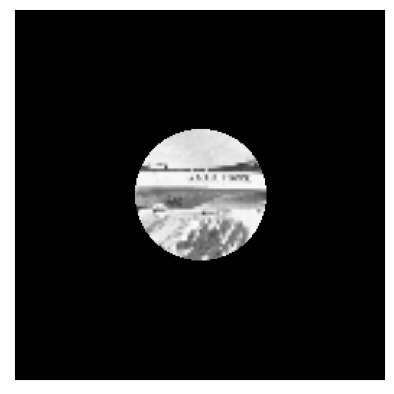

In [130]:
if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

kolo=cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)
kolo_maska=kolo.astype('bool').astype('uint8')
jet_maska=cv2.multiply(Jet, kolo_maska)

plt.imshow(jet_maska)
plt.xticks([])
plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

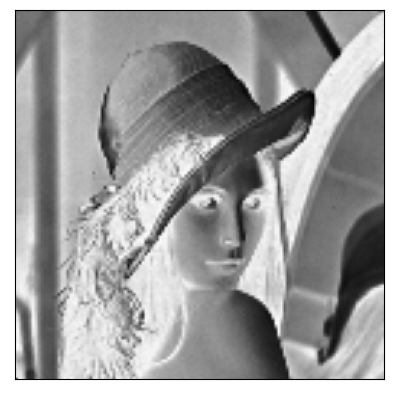

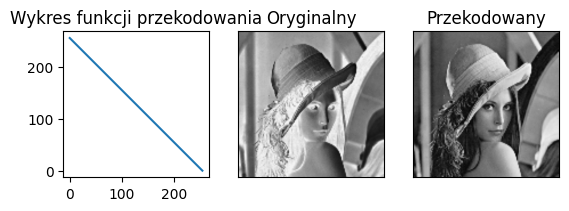

In [131]:
Neg = cv2.bitwise_not(Lena)
plt.imshow(Neg)
plt.xticks([])
plt.yticks([])
plt.show()
LUT(Neg, lut.odwrotna)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

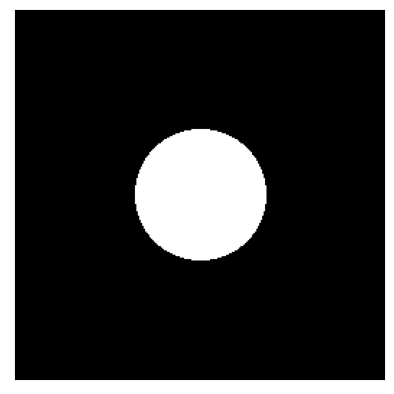

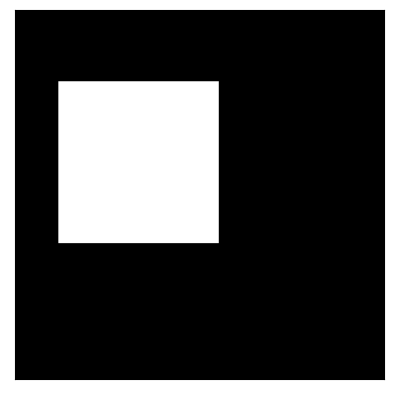

In [132]:
if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
    
if not os.path.exists("kwadrat.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kwadrat=cv2.imread("kwadrat.bmp", cv2.IMREAD_GRAYSCALE)

plt.imshow(kolo)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

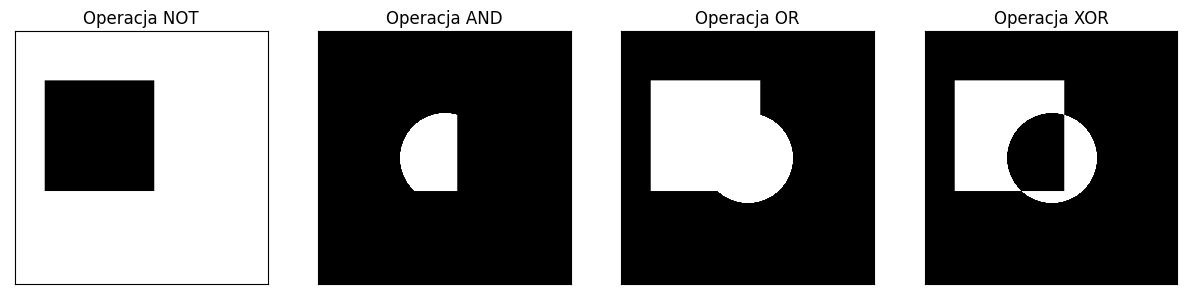

In [133]:
Not=~kwadrat
And=kolo&kwadrat
Or=kolo|kwadrat
Xor=kolo^kwadrat
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,15))
ax1.set_title('Operacja NOT')
ax2.set_title('Operacja AND')
ax3.set_title('Operacja OR')
ax4.set_title('Operacja XOR')
ax1.imshow(Not)
ax2.imshow(And)
ax3.imshow(Or)
ax4.imshow(Xor)
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()